In [1]:
import os, shutil

In [2]:
# OS help us creating directories

In [3]:
# old folder that already exist
original_dataset_dir = 'catvsdog'
# new folder we want to create
base_dir = 'catvsdog_small'
os.mkdir(base_dir)

<img src='path.png'>

In [4]:
# join sub-folders in your new folders namely (train, test and validation)

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
# join sub-folders in each of your new sub-folders namely (cats and dogs)

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)


In [8]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


In [9]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [10]:
# Takes each picture name/ path.

In [11]:
fnames = [f'cat.{i}.jpg' for i in range(0, 1000)]

In [12]:
# Fetches out the cats pictures from old and then saves it into the new folder.

In [13]:
# Saving image in train folder: 

In [14]:
for fname in fnames:
    src = os.path.join(original_dataset_dir + "/train/cats", fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(
        src, 
        dst
    )

In [15]:
fnames_val = [f'cat.{i}.jpg' for i in range(1000, 1500)]

In [16]:
# Saving image in validation folder: 
for fname in fnames_val:
    src = os.path.join(original_dataset_dir + "/validation/cats", fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(
        src, 
        dst
    )

In [17]:
fnames_test = [f'cat.{i}.jpg' for i in range(1500, 2000)]

# Saving image in test folder: 
for fname in fnames_test:
    src = os.path.join(original_dataset_dir + "/test/cats", fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(
        src, 
        dst
    )

In [18]:
# Same For Dogs: 

In [19]:
fnames = [f'dog.{i}.jpg' for i in range(0, 1000)]
# Fetches out the dogs pictures from old and then saves it into the new folder.
# Saving image in train folder: 
for fname in fnames:
    src = os.path.join(original_dataset_dir + "/train/dogs", fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(
        src, 
        dst
    )

In [20]:
fnames_val = [f'dog.{i}.jpg' for i in range(1000, 1500)]

# Saving image in validation folder: 
for fname in fnames_val:
    src = os.path.join(original_dataset_dir + "/validation/dogs", fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(
        src, 
        dst
    )

In [21]:
fnames_test = [f'dog.{i}.jpg' for i in range(1500, 2000)]

# Saving image in test folder: 
for fname in fnames_test:
    src = os.path.join(original_dataset_dir + "/test/dogs", fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(
        src, 
        dst
    )

In [22]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [23]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [25]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [28]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30


C:\Users\LAB02R~1\AppData\Local\Temp/ipykernel_12008/4224276573.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


100/100 [==============================] - 32s 313ms/step - loss: 0.6930 - acc: 0.5310 - val_loss: 0.6966 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 25s 254ms/step - loss: 0.6636 - acc: 0.6070 - val_loss: 0.6653 - val_acc: 0.5840
Epoch 3/30
100/100 [==============================] - 26s 260ms/step - loss: 0.6249 - acc: 0.6585 - val_loss: 0.6264 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 26s 262ms/step - loss: 0.5858 - acc: 0.6920 - val_loss: 0.6365 - val_acc: 0.6220
Epoch 5/30
100/100 [==============================] - 27s 267ms/step - loss: 0.5421 - acc: 0.7230 - val_loss: 0.6557 - val_acc: 0.6460
Epoch 6/30
100/100 [==============================] - 27s 267ms/step - loss: 0.5060 - acc: 0.7530 - val_loss: 0.5983 - val_acc: 0.6730
Epoch 7/30
100/100 [==============================] - 25s 247ms/step - loss: 0.4779 - acc: 0.7740 - val_loss: 0.5732 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 26s 256ms/st

In [29]:
model.save('cats_and_dogs_small_1.h5')

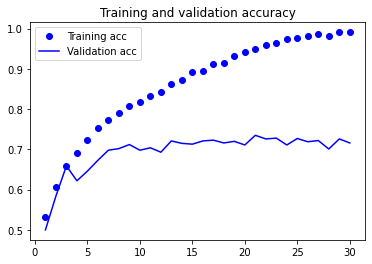

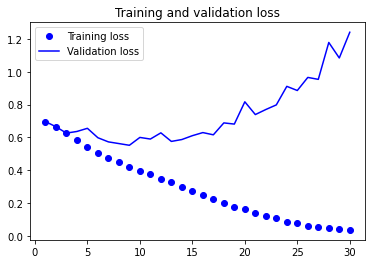

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [40]:
import keras
import keras.utils as image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = keras.utils.load_img(img_path, target_size=(150, 150))

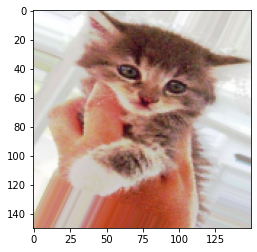

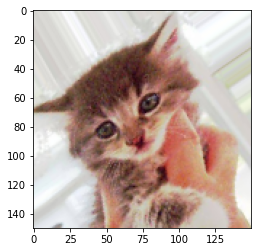

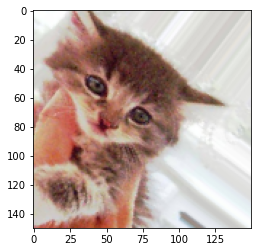

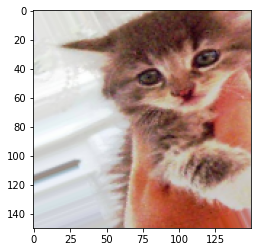

In [42]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [43]:
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
img_path = fnames[3]
img = keras.utils.load_img(img_path, target_size=(150, 150))

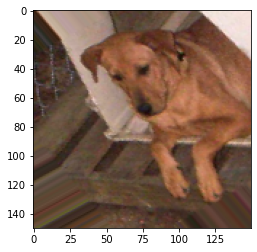

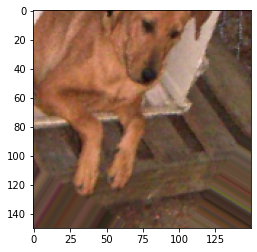

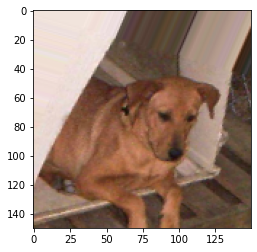

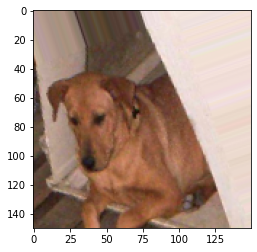

In [44]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [47]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\LAB02R~1\AppData\Local\Temp/ipykernel_12008/4059045241.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 27s 260ms/step - loss: 0.6924 - acc: 0.5085 - val_loss: 0.6868 - val_acc: 0.5000


In [48]:
model.save('cats_and_dogs_small_2.h5')

In [49]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))


58889256/58889256 [==============================] - 16s 0us/step


In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [52]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Page: 150